# Herramientas Utilizadas

Librerias necesarias para llevar a cabo el preprocesamiento y crear los modelos que se evaluarán.


In [ ]:
# Buscar la ruta donde se encuentra el archivo
from google.colab \
import drive
import os, glob

my_name = 'Eleccion y evaluacion del Modelo.ipynb'

drive.mount(os.getcwd() + '/drive')
my_path = glob.glob(os.getcwd() + '/**/' +
my_name, recursive = True)

# some 'list comprehension'.
my_path = [my_i
for my_i in my_path if len(my_i) in [max([len(my_i)
for my_i in my_path])]
][0];

path = my_path.replace("Eleccion y evaluacion del Modelo.ipynb", "")

# Credenciales para poder crear, subir, borrar y modificar archivos en Google Drive
from google.colab import auth
auth.authenticate_user()

# Librería para utilizar hojas de calculo de google
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

from google.colab import drive
drive.mount('/content/drive')

# **Descargas de las letras**
# Librería para hacer peticiones a paginas
import requests

#Libreria para limpiar los documentos HTML
from bs4 import BeautifulSoup

# Libreria para limpiar texto
import re

# Gspread te impide actualizar tablas si sobrepasas un numero de peticiones en
# un espacio de tiempo, por lo que hay que esperar entre peticiones
import time

# **Preprocesamiento de datos**
# Librería para tokenizar, lematizar y hacer stemming
import nltk
nltk.download('punkt')

# Palabras vacias
from nltk.corpus import stopwords
nltk.download('stopwords')

# Librería para interpretar o eliminar emojis
!pip install emoji
import emoji

# Librería que detecta el idioma de un texto
!pip install langdetect
from langdetect import detect

# Palabras vacias
english_stop= stopwords.words('english')

# Tokenizador
from nltk.tokenize import WhitespaceTokenizer
tokenizer = WhitespaceTokenizer()

# Stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# Lematizador
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# **Analisis de datasets**
# Libreria dedicada al PLN
!pip install spacy
!pip install --upgrade pandas

# Escogemos el modelo eficiente, pero menos preciso del idioma ingles
import spacy.cli
spacy.cli.download("en_core_web_md")
import en_core_web_md
nlp = en_core_web_md.load()

nltk.download('omw-1.4')

# Estadisticas para el analisis de conjuntos de datos
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.text import Text

# Libreria para visualizar graficas
import matplotlib.pyplot as plt

# **Etiquetado**
# Metricas para evaluar la clasificacion
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, multilabel_confusion_matrix, average_precision_score, precision_score, recall_score, coverage_error, label_ranking_average_precision_score, label_ranking_loss, classification_report
from sklearn.metrics import confusion_matrix

# Vectorizador TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Separar datasets en conjuntos de entrenamiento y testo
from sklearn.model_selection import train_test_split

# Validación cruzada
from sklearn.model_selection import cross_val_score

# Libreria para hacer overampling
from imblearn.over_sampling import SMOTE

# Algoritmos de clasificacion usados
# Aprendizaje no supervisado
from sklearn.cluster import KMeans

# Aprendizaje supervisado
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn import tree

# Clasificación multietiqueta
from sklearn.multioutput import MultiOutputClassifier

!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

!pip install scipy
import scipy
from scipy.sparse import csr_matrix, isspmatrix
from scipy.sparse import hstack

import random

#Metricas para la evaluacion y utilidades para el entrenamiento
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import numpy as np
from statistics import mean


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Preprocesamiento de datos

Funcion para limpiar el texto de las canciones y de los diferentes datasets.

In [ ]:
# Funcion para limpiar texto
def clean_text(text):
    text = emoji.demojize(text)
    text = text.lower()
    text = re.sub(r'(?<=@)\w+','',text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"'m", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("[^a-zA-Z0-9 ]", "", text)
    text = re.sub('verse', "", text)
    text = re.sub('chorus', '', text)
    text = re.sub('instrumental', '', text)
    text = re.sub('guitar solo', '', text)
    text = re.sub('solo guitar', '', text)
    text = re.sub('intro', '', text)
    text = re.sub('user', '', text)
    text = re.sub('hashtag', '', text)
    text = re.sub('url', '', text)
    text = re.sub('oh', '', text)
    text = re.sub('ooh', '', text)
    text = re.sub('na', '', text)
    text = re.sub('nana', '', text)
    text = re.sub('eh', '', text)
    text = re.sub('da', '', text)
    text = text.strip(' ')
    final_text=""

    return text

Función para eliminar las palabras vacias. Se lematizan las palabras para que la deteccion de las palabras vacias sea mas eficaz.

In [ ]:
def deleteStopwords(text):
  textFiltered =""
  words = tokenizer.tokenize(text)
  for w in words:
    if w not in english_stop:
        #textFiltered=textFiltered+ " " + stemmer.stem(w)
        textFiltered=textFiltered+ " " + lemmatizer.lemmatize(w)

  return textFiltered

Preprocesamiento de los diferentes datasets y canciones descargadas.

In [ ]:
# Preprocesamiento del corpus creado
worksheet = gc.open("corpus_final").sheet1
datos_corpus = worksheet.get_all_values()
corpus_data = []
corpus_label = []
for i in range(0,8):
  lista = []
  corpus_label.append(lista)

for i in range (1,len(datos_corpus)):
  corpus_data.append(datos_corpus[i][2])

  labels_song=[]
  for j in range(3,11):
    label=datos_corpus[i][j]
    label=int(label)
    corpus_label[j-3].append(label)

# Preprocesamiento del corpus EdmondsDance
worksheet4 = gc.open("EdmondsDance 2").sheet1
EdmondsDance_corpus = worksheet4.get_all_values()
EdmondsDance_data = []
EdmondsDance_label = []
for i in range(0,8):
  lista = []
  EdmondsDance_label.append(lista)

for i in range (1,len(EdmondsDance_corpus)):
  text=EdmondsDance_corpus[i][3]
  text=re.sub('<br>', '/', text)
  song=""
  for j in text.split('/'):
    song=song+clean_text(j)+" / "

  song=deleteStopwords(song)
  EdmondsDance_data.append(song)

  labels_song=[]
  for j in range(4,12):
    label=EdmondsDance_corpus[i][j]
    label=int(label)
    EdmondsDance_label[j-4].append(label)
  EdmondsDance_label.append(labels_song)

# Preprocesamiento del corpus Validacion EdmondsDance
worksheet4 = gc.open("Validacion Edmonds Dance").sheet1
val_EdmondsDance_corpus = worksheet4.get_all_values()
val_EdmondsDance_data = []
val_EdmondsDance_label = []
for i in range(0,8):
  lista = []
  val_EdmondsDance_label.append(lista)

for i in range (0,len(val_EdmondsDance_corpus)):
  text=val_EdmondsDance_corpus[i][2]
  text=re.sub('<br>', '/', text)
  song=""
  for j in text.split('/'):
    song=song+clean_text(j)+" / "

  song=deleteStopwords(song)
  val_EdmondsDance_data.append(song)

  labels_song=[]
  for j in range(3,11):
    label=val_EdmondsDance_corpus[i][j]
    label=int(label)
    val_EdmondsDance_label[j-3].append(label)
  val_EdmondsDance_label.append(labels_song)
# Preprocesamiento del corpus SemEval2018
# Archivo dev
notvalid = [0,0,0,0,0,0,0,0]

archivo_dev = open(path+"datasets/SemEval 2018-E-c-En-dev.txt")
SemEval2018_dev_data = []
SemEval2018_dev_label = []
for i in range(0,8):
  lista = []
  SemEval2018_dev_label.append(lista)

for linea in archivo_dev.readlines()[1:]:
  datos = linea.split('\t')
  #introducimos las etiquetas en el mismo orden que el corpus EdmondsDance
  labels_tweet =[]
  labels_tweet.append(int(datos[6]))
  labels_tweet.append(int(datos[12]))
  labels_tweet.append(int(datos[5]))
  labels_tweet.append(int(datos[11]))
  labels_tweet.append(int(datos[10]))
  labels_tweet.append(int(datos[4]))
  labels_tweet.append(int(datos[2]))
  labels_tweet.append(int(datos[3]))

  if(labels_tweet!=notvalid):
    SemEval2018_dev_data.append(deleteStopwords(clean_text(datos[1])))
    for j in range(0,8):
      SemEval2018_dev_label[j].append(labels_tweet[j])

# Archivo train

archivo_train = open(path+"datasets/SemEval 2018-E-c-En-train.txt")
SemEval2018_train_data = []
SemEval2018_train_label = []
for i in range(0,8):
  lista = []
  SemEval2018_train_label.append(lista)

for linea in archivo_train.readlines()[1:]:
  datos = linea.split('\t')
  #introducimos las etiquetas en el mismo orden que el corpus EdmondsDance
  labels_tweet =[]
  labels_tweet.append(int(datos[6]))
  labels_tweet.append(int(datos[12]))
  labels_tweet.append(int(datos[5]))
  labels_tweet.append(int(datos[11]))
  labels_tweet.append(int(datos[10]))
  labels_tweet.append(int(datos[4]))
  labels_tweet.append(int(datos[2]))
  labels_tweet.append(int(datos[3]))

  if(labels_tweet!=notvalid):
    SemEval2018_train_data.append(deleteStopwords(clean_text(datos[1])))
    for j in range(0,8):
      SemEval2018_train_label[j].append(labels_tweet[j])

# Preprocesamiento del corpus XED
archivo = open(path+"datasets/XED en-annotated.tsv")
XED_data = []
XED_label = []
for i in range(0,8):
  lista = []
  XED_label.append(lista)

for linea in archivo.readlines()[1:]:

  datos = linea.split('\t')
  labels =datos[1]
  labels = re.sub('\n',"",labels)
  labels = labels.split(',')
  if(labels[0]!='0'):
    labels_dialog =[0,0,0,0,0,0,0,0]
    for i in labels:
      if i == '1':
        labels_dialog[6]=1
      if i == '2' or i ==' 2':
        labels_dialog[7]=1
      if i == '3' or i ==' 3':
        labels_dialog[5]=1
      if i == '4' or i ==' 4':
        labels_dialog[2]=1
      if i == '5' or i ==' 5':
        labels_dialog[0]=1
      if i == '6' or i ==' 6':
        labels_dialog[4]=1
      if i == '7' or i ==' 7':
        labels_dialog[3]=1
      if i == '8' or i ==' 8':
        labels_dialog[1]=1

    XED_data.append(deleteStopwords(clean_text(datos[0])))
    for j in range(0,8):
      XED_label[j].append(labels_dialog[j])

# Adquisicion de datos

In [ ]:
worksheet = gc.open("dataJoyEdmondsDance 2").sheet1
datos = worksheet.get_all_values()
dataJoyEdmondsDance = []
LabelJoyEdmondsDance = []
scoresJoyEdmondsDance = []

for i in range (0,len(datos)):
  dataJoyEdmondsDance.append(datos[i][0])
  LabelJoyEdmondsDance.append(int(datos[i][1]))
  scores_song=[]
  for j in range(2,10):
    score=datos[i][j]
    score = re.sub(",", ".", score)
    score=float(score)
    scores_song.append(score)
  scoresJoyEdmondsDance.append(scores_song)

In [ ]:
worksheet = gc.open("dataTrustEdmondsDance 2").sheet1
datos = worksheet.get_all_values()
dataTrustEdmondsDance = []
LabelTrusEdmondsDance = []
scoresTrusEdmondsDance = []

for i in range (0,len(datos)):
  dataTrustEdmondsDance.append(datos[i][0])
  LabelTrusEdmondsDance.append(int(datos[i][1]))
  scores_song=[]
  for j in range(2,10):
    score=datos[i][j]
    score = re.sub(",", ".", score)
    score=float(score)
    scores_song.append(score)
  scoresTrusEdmondsDance.append(scores_song)

In [ ]:
worksheet = gc.open("dataSurpriseEdmondsDance 2").sheet1
datos = worksheet.get_all_values()
dataSurpriseEdmondsDance = []
LabelSurpriseEdmondsDance = []
scoresSurpriseEdmondsDance = []

for i in range (0,len(datos)):
  dataSurpriseEdmondsDance.append(datos[i][0])
  LabelSurpriseEdmondsDance.append(int(datos[i][1]))
  scores_song=[]
  for j in range(2,10):
    score=datos[i][j]
    score = re.sub(",", ".", score)
    score=float(score)
    scores_song.append(score)
  scoresSurpriseEdmondsDance.append(scores_song)

In [ ]:
worksheet = gc.open("dataSadnessEdmondsDance 2").sheet1
datos = worksheet.get_all_values()
dataSadnessEdmondsDance = []
LabelSadnessEdmondsDance = []
scoresSadnessEdmondsDance = []

for i in range (0,len(datos)):
  dataSadnessEdmondsDance.append(datos[i][0])
  LabelSadnessEdmondsDance.append(int(datos[i][1]))
  scores_song=[]
  for j in range(2,10):
    score=datos[i][j]
    score = re.sub(",", ".", score)
    score=float(score)
    scores_song.append(score)
  scoresSadnessEdmondsDance.append(scores_song)

In [ ]:
worksheet = gc.open("dataDisgustEdmondsDance 2").sheet1
datos = worksheet.get_all_values()
dataDisgustEdmondsDance = []
LabelDisgustEdmondsDance = []
scoresDisgustEdmondsDance = []

for i in range (0,len(datos)):
  dataDisgustEdmondsDance.append(datos[i][0])
  LabelDisgustEdmondsDance.append(int(datos[i][1]))
  scores_song=[]
  for j in range(2,10):
    score=datos[i][j]
    score = re.sub(",", ".", score)
    score=float(score)
    scores_song.append(score)
  scoresDisgustEdmondsDance.append(scores_song)

In [ ]:
worksheet = gc.open("dataAngerEdmondsDance 2").sheet1
datos = worksheet.get_all_values()
dataAngerEdmondsDance = []
LabelAngerEdmondsDance = []
scoresAngerEdmondsDance = []

for i in range (0,len(datos)):
  dataAngerEdmondsDance.append(datos[i][0])
  LabelAngerEdmondsDance.append(int(datos[i][1]))
  scores_song=[]
  for j in range(2,10):
    score=datos[i][j]
    score = re.sub(",", ".", score)
    score=float(score)
    scores_song.append(score)
  scoresAngerEdmondsDance.append(scores_song)

In [ ]:
worksheet = gc.open("dataFearEdmondsDance 2").sheet1
datos = worksheet.get_all_values()
dataFearEdmondsDance = []
LabelFeaEdmondsDance = []
scoresFearEdmondsDance = []

for i in range (0,len(datos)):
  dataFearEdmondsDance.append(datos[i][0])
  LabelFeaEdmondsDance.append(int(datos[i][1]))
  scores_song=[]
  for j in range(2,10):
    score=datos[i][j]
    score = re.sub(",", ".", score)
    score=float(score)
    scores_song.append(score)
  scoresFearEdmondsDance.append(scores_song)

In [ ]:
worksheet = gc.open("dataAnticipationEdmondsDance 2").sheet1
datos = worksheet.get_all_values()
dataAnticipationEdmondsDance = []
LabelAnticipationEdmondsDance = []
scoresAnticipationEdmondsDance = []

for i in range (0,len(datos)):
  dataAnticipationEdmondsDance.append(datos[i][0])
  LabelAnticipationEdmondsDance.append(int(datos[i][1]))
  scores_song=[]
  for j in range(2,10):
    score=datos[i][j]
    score = re.sub(",", ".", score)
    score=float(score)
    scores_song.append(score)
  scoresAnticipationEdmondsDance.append(scores_song)

# Evaluador de emociones

Dado un texto se analizará y se devolvera una puntuacion normalizada de cada emoción

In [ ]:
def getIntensityLexicon(path):
  lexicon = dict()
  f = open(path)
  for line in f.readlines():
    lexicon[line.split()[0]]=float(line.split()[1])
  f.close()
  return lexicon

In [ ]:
intensityWords=[]
f = open(path+"Lexicones/NRC-Emotion-Intensity/anger-NRC-EmoIntv1-withZeroIntensityEntries.txt")
for line in f.readlines():
  intensityWords.append(line.split()[0])
f.close()

path_lexicon = path+"Lexicones/NRC-Emotion-Intensity/"
anger_intensity_lexicon = getIntensityLexicon(path_lexicon + "anger-NRC-EmoIntv1-withZeroIntensityEntries.txt")
disgust_intensity_lexicon = getIntensityLexicon(path_lexicon + "disgust-NRC-EmoIntv1-withZeroIntensityEntries.txt")
fear_intensity_lexicon = getIntensityLexicon(path_lexicon + "fear-NRC-EmoIntv1-withZeroIntensityEntries.txt")
joy_intensity_lexicon = getIntensityLexicon(path_lexicon + "joy-NRC-EmoIntv1-withZeroIntensityEntries.txt")
sadness_intensity_lexicon = getIntensityLexicon(path_lexicon + "sadness-NRC-EmoIntv1-withZeroIntensityEntries.txt")
surprise_intensity_lexicon = getIntensityLexicon(path_lexicon + "surprise-NRC-EmoIntv1-withZeroIntensityEntries.txt")
trust_intensity_lexicon = getIntensityLexicon(path_lexicon + "trust-NRC-EmoIntv1-withZeroIntensityEntries.txt")
anticipation_intensity_lexicon = getIntensityLexicon(path_lexicon + "anticipation-NRC-EmoIntv1-withZeroIntensityEntries.txt")

def findOnIntentityLexicon(word):
  findedOn = []
  for i in range(8):
    findedOn.append(0.0)

  if word in intensityWords:
    findedOn[0]=anger_intensity_lexicon[word]
    findedOn[1]=disgust_intensity_lexicon[word]
    findedOn[2]=fear_intensity_lexicon[word]
    findedOn[3]=joy_intensity_lexicon[word]
    findedOn[4]=sadness_intensity_lexicon[word]
    findedOn[5]=surprise_intensity_lexicon[word]
    findedOn[6]=trust_intensity_lexicon[word]
    findedOn[7]=anticipation_intensity_lexicon[word]


  return findedOn

In [ ]:
def songScorer(text,spliter):
  # Evaluacion final que sera devuelta
  findedWords = 0
  total = 0
  scores=[0,0,0,0,0,0,0,0]
  no_emotion = scores

  for verse in text.split(spliter):
    doc = nlp(verse)
    for token in doc:
      negated = False
      emotion = findOnIntentityLexicon(token.text)
      if emotion != no_emotion:
        # Tratamiento de la negacion
        for child in token.head.children:
          if child.dep_ == "neg":
            negated = True

        if negated == False:
          for i in range(8):
            total = total + emotion[i]
            scores[i] = scores[i] + emotion[i]

  if total != 0:
    for i in range(8):
      scores[i] = scores[i]/total

  return scores

In [ ]:
scores_EdmondsDance=[]
for i in EdmondsDance_data:
  scores_EdmondsDance.append(songScorer(i,"/"))

In [ ]:
scores_val_EdmondsDance=[]
for i in val_EdmondsDance_data:
  scores_val_EdmondsDance.append(songScorer(i,"/"))

In [ ]:
scores_corpus=[]
for i in corpus_data:
  scores_corpus.append(songScorer(i,"/"))

scores_XED=[]
for i in XED_data:
  scores_XED.append(songScorer(i,"."))

scores_SemEval=[]
for i in SemEval2018_train_data:
  scores_SemEval.append(songScorer(i,"."))



#Undersampling

Undersampling para equilibrar los datasets

In [ ]:
def undersampling(dataset_data, dataset_label, data_features, emocion):
  nEtiquetas=0
  indicesEmocion=[]
  for i in range(0, len(dataset_label[emocion])):
    if dataset_label[emocion][i]==1:
      nEtiquetas=nEtiquetas+1
      indicesEmocion.append(i)

  if nEtiquetas*2>=len(dataset_label[emocion]):
    data = dataset_data
    features=data_features
    label = []
    for j in dataset_label[emocion]:
      label.append(j)
  else:
    data=[]
    label=[]
    features=[]

    for i in indicesEmocion:
      data.append(dataset_data[i])
      features.append(data_features[i])
      label.append(1)

    while len(label) < nEtiquetas*2:
      posible = random.randint(0, len(dataset_label[emocion])-1)

      if posible not in indicesEmocion:
        data.append(dataset_data[posible])
        features.append(data_features[posible])
        label.append(0)

  return data, label, features

In [ ]:
dataJoyCorpus, LabelJoyCorpus, scoresJoyCorpus = undersampling(corpus_data, corpus_label, scores_corpus, 0)
dataTrustCorpus, LabelTrusCorpus, scoresTrusCorpus = undersampling(corpus_data, corpus_label, scores_corpus, 1)
dataFearCorpus, LabelFearCorpus, scoresFearCorpus = undersampling(corpus_data, corpus_label, scores_corpus, 2)
dataSurpriseCorpus, LabelSurpriseCorpus, scoresSurpriseCorpus = undersampling(corpus_data, corpus_label, scores_corpus, 3)
dataSadnessCorpus, LabelSadnessCorpus, scoresSadnessCorpus = undersampling(corpus_data, corpus_label, scores_corpus, 4)
dataDisgustCorpus, LabelDisgustCorpus, scoresDisgustCorpus = undersampling(corpus_data, corpus_label, scores_corpus, 5)
dataAngerCorpus, LabelAngerCorpus, scoresAngerCorpus = undersampling(corpus_data, corpus_label, scores_corpus, 6)
dataAnticipationCorpus, LabelAnticipationCorpus, scoresAnticipationCorpus = undersampling(corpus_data, corpus_label, scores_corpus, 7)

In [ ]:
dataJoyXED, LabelJoyXED, scoresJoyXED = undersampling(XED_data, XED_label, scores_XED, 0)
dataTrustXED, LabelTrusXED, scoresTrusXED = undersampling(XED_data, XED_label, scores_XED, 1)
dataFearXED, LabelFearXED, scoresFearXED = undersampling(XED_data, XED_label, scores_XED, 2)
dataSurpriseXED, LabelSurpriseXED, scoresSurpriseXED = undersampling(XED_data, XED_label, scores_XED, 3)
dataSadnessXED, LabelSadnessXED, scoresSadnessXED = undersampling(XED_data, XED_label, scores_XED, 4)
dataDisgustXED, LabelDisgustXED, scoresDisgustXED = undersampling(XED_data, XED_label, scores_XED, 5)
dataAngerXED, LabelAngerXED, scoresAngerXED = undersampling(XED_data, XED_label, scores_XED, 6)
dataAnticipationXED, LabelAnticipationXED, scoresAnticipationXED = undersampling(XED_data, XED_label, scores_XED, 7)

In [ ]:
dataJoySemEval, LabelJoySemEval, scoresJoySemEval = undersampling(SemEval2018_train_data, SemEval2018_train_label, scores_SemEval, 0)
dataTrustSemEval, LabelTrusSemEval, scoresTrusSemEval = undersampling(SemEval2018_train_data, SemEval2018_train_label, scores_SemEval, 1)
dataFearSemEval, LabelFearSemEval, scoresFearSemEval = undersampling(SemEval2018_train_data, SemEval2018_train_label, scores_SemEval, 2)
dataSurpriseSemEval, LabelSurpriseSemEval, scoresSurpriseSemEval = undersampling(SemEval2018_train_data, SemEval2018_train_label, scores_SemEval, 3)
dataSadnessSemEval, LabelSadnessSemEval, scoresSadnessSemEval = undersampling(SemEval2018_train_data, SemEval2018_train_label, scores_SemEval,4)
dataDisgustSemEval, LabelDisgustSemEval, scoresDisgustSemEval = undersampling(SemEval2018_train_data, SemEval2018_train_label, scores_SemEval, 5)
dataAngerSemEval, LabelAngerSemEval, scoresAngerSemEval = undersampling(SemEval2018_train_data, SemEval2018_train_label, scores_SemEval, 6)
dataAnticipationSemEval, LabelAnticipationSemEval, scoresAnticipationSemEval = undersampling(SemEval2018_train_data, SemEval2018_train_label, scores_SemEval, 7)

#Eleccion del modelo

En este apartado se llevan las pruebas necesarias para elegir el modelo de nuestra demo

### Funciones para realizar las pruebas de Naive Bayes y SVM

In [ ]:
def test_edmondsDance_alg(model, data, label, features, emocion):
  x_train=vectorizer.fit_transform(data)
  x_test=vectorizer.transform(EdmondsDance_data)

  sparce_train = csr_matrix(features)
  sparce_test = csr_matrix(scores_EdmondsDance)

  x_train = hstack((x_train, sparce_train))
  x_test = hstack((x_test, sparce_test))

  model.fit(x_train, label)

  prediction=model.predict(x_test)

  print('Accuracy: ',
          accuracy_score(EdmondsDance_label[emocion], prediction)*100, '%')
  print('F1: ',
        f1_score(EdmondsDance_label[emocion], prediction)*100, '%')
  print('Recall: ',
        recall_score(EdmondsDance_label[emocion], prediction)*100, '%')
  print('Precision: ',
        precision_score(EdmondsDance_label[emocion], prediction)*100, '%')


In [ ]:
def validacionCruzada(model, data, label, features, splits):
    accuracy_scores=[]
    f1_scores=[]
    precision_scores=[]
    recall_scores=[]

    skf = StratifiedKFold(n_splits=splits)
    for train_index, test_index in skf.split(data, label):
      x_train_fold, x_test_fold = np.array(data)[train_index], np.array(data)[test_index]
      y_train_fold, y_test_fold = np.array(label)[train_index], np.array(label)[test_index]

      x_train = vectorizer.fit_transform(x_train_fold)
      x_test = vectorizer.transform(x_test_fold)

      features_train, features_test = np.array(features)[train_index], np.array(features)[test_index]
      sparce_train = csr_matrix(features_train)
      sparce_test = csr_matrix(features_test)
      x_train = hstack((x_train, sparce_train))
      x_test = hstack((x_test, sparce_test))

      model.fit(x_train, y_train_fold)
      prediction=model.predict(x_test)

      accuracy_scores.append(accuracy_score(y_test_fold, prediction))
      f1_scores.append(f1_score(y_test_fold, prediction))
      precision_scores.append(precision_score(y_test_fold, prediction))
      recall_scores.append(recall_score(y_test_fold, prediction))

    print('Accuracy:', accuracy_scores)
    print('\t Accuracy Media:',
          mean(accuracy_scores)*100, '%')

    print('\n F1:', f1_scores)
    print('\t F1 Media:',
          mean(f1_scores)*100, '%')

    print('\nRecall:', recall_scores)
    print('\t Recall Media:',
          mean(recall_scores)*100, '%')

    print('\nPrecision:', precision_scores)
    print('\t Precision Media:',
          mean(precision_scores)*100, '%')


### Funciones para las pruebas de Sentiment CNN

In [ ]:
def pad_features(tokenized_reviews, seq_length):
    ''' Return features of tokenized_reviews, where each review is padded with 0's
        or truncated to the input seq_length.
    '''

    # getting the correct rows x cols shape
    features = np.zeros((len(tokenized_reviews), seq_length), dtype=int)

    # for each review, I grab that review and
    for i, row in enumerate(tokenized_reviews):
        features[i, -len(row):] = np.array(row)[:seq_length]

    return features



In [ ]:
from collections import Counter
len_corpus = Counter([len(x.split()) for x in corpus_data])

max_len_corpus = max(len_corpus)

In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_len_corpus)
tokenizer.fit_on_texts(corpus_data)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentCNN(nn.Module):
    """
    The embedding layer + CNN model that will be used to perform sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim,
                 num_filters=100, kernel_sizes=[3, 4, 5], freeze_embeddings=True, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentCNN, self).__init__()

        # set class vars
        self.num_filters = num_filters
        self.embedding_dim = embedding_dim

        # 1. embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # 2. convolutional layers
        self.convs_1d = nn.ModuleList([
            nn.Conv2d(1, num_filters, (k, embedding_dim), padding=(k-2,0))
            for k in kernel_sizes])

        # 3. final, fully-connected layer for classification
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, output_size)

        # 4. dropout and sigmoid layers
        self.dropout = nn.Dropout(drop_prob)
        self.sig = nn.Sigmoid()


    def conv_and_pool(self, x, conv):
        """
        Convolutional + max pooling layer
        """
        # squeeze last dim to get size: (batch_size, num_filters, conv_seq_length)
        # conv_seq_length will be ~ 200
        x = F.relu(conv(x)).squeeze(3)

        # 1D pool over conv_seq_length
        # squeeze to get size: (batch_size, num_filters)
        x_max = F.max_pool1d(x, x.size(2)).squeeze(2)
        return x_max

    def forward(self, x):
        """
        Defines how a batch of inputs, x, passes through the model layers.
        Returns a single, sigmoid-activated class score as output.
        """
        # embedded vectors
        embeds = self.embedding(x) # (batch_size, seq_length, embedding_dim)
        # embeds.unsqueeze(1) creates a channel dimension that conv layers expect
        embeds = embeds.unsqueeze(1)

        # get output of each conv-pool layer
        conv_results = [self.conv_and_pool(embeds, conv) for conv in self.convs_1d]

        # concatenate results and add dropout
        x = torch.cat(conv_results, 1)
        x = self.dropout(x)

        # final logit
        logit = self.fc(x)

        # sigmoid-activated --> a class score
        return self.sig(logit)

In [ ]:
palabras_entrenadas = tokenizer.get_config()['word_counts']

In [ ]:
import json
vocabulario = json.loads(palabras_entrenadas)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Entrenamiento
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

# training loop
def train(net, train_loader,valid_loader, epochs, print_every=10):

    # move model to GPU, if available
    if(train_on_gpu):
        net.cuda()

    counter = 0 # for printing

    # train for some number of epochs
    net.train()
    for e in range(epochs):
        # batch loop
        for inputs, labels in train_loader:

            counter += 1

            if(train_on_gpu):
                inputs, labels = inputs.cuda(), labels.cuda()

            # zero accumulated gradients
            net.zero_grad()

            # get the output from the model
            output = net(inputs)

            # calculate the loss and perform backprop
            loss = criterion(output.squeeze(), labels.float())
            loss.backward()
            optimizer.step()

            # loss stats
            if counter % print_every == 0:
                # Get validation loss
                val_losses = []
                net.eval()
                for inputs, labels in valid_loader:

                    if(train_on_gpu):
                        inputs, labels = inputs.cuda(), labels.cuda()

                    output = net(inputs)
                    val_loss = criterion(output.squeeze(), labels.float())

                    val_losses.append(val_loss.item())

                net.train()
                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(val_losses)))

No GPU available, training on CPU.


In [ ]:
    vocab_size = len(vocabulario.values())
    output_size = 1 # binary class (1 or 0)
    embedding_dim = 300
    num_filters = 100
    kernel_sizes = [3, 4, 5]

    net = SentimentCNN(vocab_size, output_size, embedding_dim,
                        num_filters, kernel_sizes)
    lr=0.0001

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [ ]:
def test(model, test_loader):
  labels_pred=[]
  labels_true=[]
  model.eval()
  # iterate over test data
  for inputs, labels in test_loader:
      if(train_on_gpu):
          inputs, labels = inputs.cuda(), labels.cuda()

      for i in labels.detach().numpy():
        labels_true.append(i)


      # get predicted outputs
      output = model(inputs)
      # convert output probabilities to predicted class (0 or 1)
      pred = torch.round(output.squeeze())  # rounds to the nearest integer

      for i in pred.detach().numpy():
        labels_pred.append(int(i))


  return accuracy_score(labels_true, labels_pred), f1_score(labels_true, labels_pred), precision_score(labels_true, labels_pred), recall_score(labels_true, labels_pred)

In [ ]:
criterion = nn.BCELoss()
def test_edmondsDance_cnn( data, label, epochs, emocion):

    train_y=[]
    for i in label:
      train_y.append(i)

    pre_pre_data = tokenizer.texts_to_sequences(data)
    indices_pop=[]
    contador=0
    for j in pre_pre_data:
      if(len(j)==0):
        indices_pop.append(contador)
      contador=contador+1

    indices_pop.reverse()
    for j in indices_pop:
      pre_pre_data.pop(j)
      train_y.pop(j)

    train_x = pad_features(pre_pre_data, 450)

    train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(np.asarray(train_y)))

    pre_pre_data_test = tokenizer.texts_to_sequences(EdmondsDance_data)
    pre_data_test =pad_features(pre_pre_data_test, 450)
    test_idx = int(len(EdmondsDance_data)*0.8)
    val_x, test_x = pre_data_test[:test_idx], pre_data_test[test_idx:]
    val_y, test_y = EdmondsDance_label[emocion][:test_idx], EdmondsDance_label[emocion][test_idx:]

    valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(np.asarray(val_y)))
    test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(np.asarray(test_y)))

    # dataloaders
    batch_size = 50

    # shuffling and batching data
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
    valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
    test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

    vocab_size = len(vocabulario.values())
    output_size = 1 # binary class (1 or 0)
    embedding_dim = 300
    num_filters = 100
    kernel_sizes = [3, 4, 5]

    net = SentimentCNN(vocab_size, output_size, embedding_dim,
                        num_filters, kernel_sizes)
    lr=0.0001

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    train_on_gpu=torch.cuda.is_available()

    train(net, train_loader, valid_loader, epochs, 2000)

    accuracy, f1, precision, recall = test(net, test_loader)

    print('\t Accuracy:',
          accuracy*100, '%')
    print('\t F1:',
          f1*100, '%')
    print('\t Recall:',
          recall*100, '%')
    print('\t Precision:',
          precision*100, '%')

In [ ]:
def validacion_cruzada_cnn(data, label, epochs, nsplits):

    accuracy_scores=[]
    f1_scores=[]
    precision_scores=[]
    recall_scores=[]

    train_y=[]
    for i in label:
      train_y.append(i)

    pre_pre_data = tokenizer.texts_to_sequences(data)
    indices_pop=[]
    contador=0
    for j in pre_pre_data:
      if(len(j)==0):
        indices_pop.append(contador)
      contador=contador+1

    indices_pop.reverse()
    for j in indices_pop:
      pre_pre_data.pop(j)
      train_y.pop(j)


    pre_pre_data = tokenizer.texts_to_sequences(data)
    pre_data = pad_features(pre_pre_data, 100)

    skf = StratifiedKFold(n_splits=nsplits)
    contador=0
    for train_index, test_index in skf.split(pre_data, train_y):
      contador = contador +1
      train_x, remaining_x = pre_data[train_index], pre_data[test_index]
      train_y, remaining_y = np.array(label)[train_index], np.array(label)[test_index]
      test_x, val_x, test_y, val_y = train_test_split( remaining_x, remaining_y, test_size=0.1, random_state=42)


      train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(np.asarray(train_y)))
      valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(np.asarray(val_y)))
      test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(np.asarray(test_y)))

      # dataloaders
      batch_size = 50

      # shuffling and batching data
      train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
      valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
      test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)


      vocab_size = len(vocabulario.values())
      output_size = 1 # binary class (1 or 0)
      embedding_dim = 300
      num_filters = 100
      kernel_sizes = [3, 4, 5]

      net = SentimentCNN(vocab_size, output_size, embedding_dim,
                        num_filters, kernel_sizes)
      lr=0.0001

      criterion = nn.BCELoss()
      optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.9)

      train_on_gpu=torch.cuda.is_available()



      train(net, train_loader, valid_loader, epochs, 100)

      accuracy, f1, precision, recall = test(net, test_loader)
      accuracy_scores.append(accuracy)
      f1_scores.append(f1)
      precision_scores.append(precision)
      recall_scores.append(recall)


    print('\n Acurracy:', accuracy_scores)
    print('\t Accuracy Media:',
          mean(accuracy_scores)*100, '%')

    print('\n F1:', f1_scores)
    print('\t F1 Media:',
          mean(f1_scores)*100, '%')

    print('\nRecall:', recall_scores)
    print('\t Recall Media:',
          mean(recall_scores)*100, '%')

    print('\nPrecision:', precision_scores)
    print('\t Precision Media:',
          mean(precision_scores)*100, '%')

## Naive Bayes

### Edmonds Dance

In [ ]:
ini_nb_ed=time.time()

Felicidad

In [ ]:
model_gnb = MultinomialNB()
validacionCruzada(model_gnb, dataJoyEdmondsDance, LabelJoyEdmondsDance, scoresJoyEdmondsDance, 5)

Accuracy: [0.7, 0.759493670886076, 0.759493670886076, 0.6962025316455697, 0.6582278481012658]
	 Accuracy Media: 71.46835443037975 %

 F1: [0.6470588235294117, 0.7323943661971831, 0.7076923076923077, 0.6666666666666667, 0.6301369863013699]
	 F1 Media: 67.67898300773878 %

Recall: [0.55, 0.65, 0.575, 0.6153846153846154, 0.5897435897435898]
	 Recall Media: 59.6025641025641 %

Precision: [0.7857142857142857, 0.8387096774193549, 0.92, 0.7272727272727273, 0.6764705882352942]
	 Precision Media: 78.96334557283325 %


Confianza

In [ ]:
model_gnb = MultinomialNB()
validacionCruzada(model_gnb, dataTrustEdmondsDance, LabelTrusEdmondsDance, scoresTrusEdmondsDance, 5)

Accuracy: [0.5638297872340425, 0.5531914893617021, 0.48936170212765956, 0.574468085106383, 0.5212765957446809]
	 Accuracy Media: 54.04255319148936 %

 F1: [0.7092198581560284, 0.7083333333333333, 0.6521739130434783, 0.7142857142857143, 0.6808510638297872]
	 F1 Media: 69.29727765296683 %

Recall: [0.9615384615384616, 0.9807692307692307, 0.8823529411764706, 0.9803921568627451, 0.9411764705882353]
	 Recall Media: 94.92458521870286 %

Precision: [0.5617977528089888, 0.5543478260869565, 0.5172413793103449, 0.5617977528089888, 0.5333333333333333]
	 Precision Media: 54.570360886972246 %


Miedo

In [ ]:
model_gnb = MultinomialNB()
validacionCruzada(model_gnb, dataFearEdmondsDance, LabelFeaEdmondsDance, scoresFearEdmondsDance, 5)

Accuracy: [0.6578947368421053, 0.7894736842105263, 0.6578947368421053, 0.6486486486486487, 0.7567567567567568]
	 Accuracy Media: 70.21337126600284 %

 F1: [0.7234042553191489, 0.8181818181818181, 0.6829268292682926, 0.6976744186046512, 0.7567567567567567]
	 F1 Media: 73.57888156261335 %

Recall: [0.8947368421052632, 0.9473684210526315, 0.7368421052631579, 0.7894736842105263, 0.7777777777777778]
	 Recall Media: 82.92397660818713 %

Precision: [0.6071428571428571, 0.72, 0.6363636363636364, 0.625, 0.7368421052631579]
	 Precision Media: 66.50697197539303 %


Sorpresa

In [ ]:
model_gnb = MultinomialNB()
validacionCruzada(model_gnb, dataSurpriseEdmondsDance, LabelSurpriseEdmondsDance, scoresSurpriseEdmondsDance, 5)

Accuracy: [0.6428571428571429, 0.6666666666666666, 0.6296296296296297, 0.6296296296296297, 0.6296296296296297]
	 Accuracy Media: 63.968253968253975 %

 F1: [0.6153846153846153, 0.5714285714285714, 0.5833333333333334, 0.5833333333333334, 0.6153846153846154]
	 F1 Media: 59.37728937728938 %

Recall: [0.5714285714285714, 0.42857142857142855, 0.5, 0.5384615384615384, 0.6153846153846154]
	 Recall Media: 53.07692307692308 %

Precision: [0.6666666666666666, 0.8571428571428571, 0.7, 0.6363636363636364, 0.6153846153846154]
	 Precision Media: 69.51115551115551 %


Tristeza

In [ ]:
model_gnb = MultinomialNB()
validacionCruzada(model_gnb, dataSadnessEdmondsDance, LabelSadnessEdmondsDance, scoresSadnessEdmondsDance, 5)

Accuracy: [0.7428571428571429, 0.6811594202898551, 0.782608695652174, 0.6811594202898551, 0.7681159420289855]
	 Accuracy Media: 73.11801242236025 %

 F1: [0.775, 0.6451612903225806, 0.8051948051948051, 0.6944444444444445, 0.794871794871795]
	 F1 Media: 74.2934466966725 %

Recall: [0.8857142857142857, 0.5714285714285714, 0.8857142857142857, 0.7352941176470589, 0.9117647058823529]
	 Recall Media: 79.7983193277311 %

Precision: [0.6888888888888889, 0.7407407407407407, 0.7380952380952381, 0.6578947368421053, 0.7045454545454546]
	 Precision Media: 70.60330118224856 %


Disgusto

In [ ]:
model_gnb = MultinomialNB()
validacionCruzada(model_gnb, dataDisgustEdmondsDance, LabelDisgustEdmondsDance, scoresDisgustEdmondsDance, 5)

Accuracy: [0.5952380952380952, 0.7619047619047619, 0.6666666666666666, 0.7317073170731707, 0.8292682926829268]
	 Accuracy Media: 71.69570267131242 %

 F1: [0.4848484848484849, 0.7727272727272727, 0.588235294117647, 0.7317073170731706, 0.8292682926829269]
	 F1 Media: 68.13573322899005 %

Recall: [0.38095238095238093, 0.8095238095238095, 0.47619047619047616, 0.7142857142857143, 0.85]
	 Recall Media: 64.61904761904762 %

Precision: [0.6666666666666666, 0.7391304347826086, 0.7692307692307693, 0.75, 0.8095238095238095]
	 Precision Media: 74.69103360407708 %


Furia

In [ ]:
model_gnb = MultinomialNB()
validacionCruzada(model_gnb, dataAngerEdmondsDance, LabelAngerEdmondsDance, scoresAngerEdmondsDance, 5)

Accuracy: [0.6153846153846154, 0.56, 0.84, 0.72, 0.76]
	 Accuracy Media: 69.9076923076923 %

 F1: [0.5454545454545455, 0.5217391304347826, 0.8333333333333333, 0.6956521739130435, 0.7000000000000001]
	 F1 Media: 65.92358366271411 %

Recall: [0.46153846153846156, 0.46153846153846156, 0.7692307692307693, 0.6666666666666666, 0.5833333333333334]
	 Recall Media: 58.84615384615385 %

Precision: [0.6666666666666666, 0.6, 0.9090909090909091, 0.7272727272727273, 0.875]
	 Precision Media: 75.56060606060606 %


Anticipacion

In [ ]:
model_gnb = MultinomialNB()
validacionCruzada(model_gnb, dataAnticipationEdmondsDance, LabelAnticipationEdmondsDance, scoresAnticipationEdmondsDance, 5)

Accuracy: [0.7865168539325843, 0.7303370786516854, 0.7272727272727273, 0.7727272727272727, 0.7272727272727273]
	 Accuracy Media: 74.88253319713995 %

 F1: [0.776470588235294, 0.7391304347826088, 0.7500000000000001, 0.803921568627451, 0.7446808510638298]
	 F1 Media: 76.28406885418367 %

Recall: [0.7333333333333333, 0.7727272727272727, 0.8181818181818182, 0.9318181818181818, 0.7954545454545454]
	 Recall Media: 81.03030303030303 %

Precision: [0.825, 0.7083333333333334, 0.6923076923076923, 0.7068965517241379, 0.7]
	 Precision Media: 72.65075154730327 %


In [ ]:
tiempo_nb_ed = time.time() - ini_nb_ed

### XED

In [ ]:
ini_nb_xed=time.time()

Felicidad

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataJoyXED, LabelJoyXED, scoresJoyXED, 0)

Accuracy:  61.702127659574465 %
F1:  45.78313253012048 %
Recall:  38.38383838383838 %
Precision:  56.71641791044776 %


Confianza

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataTrustXED, LabelTrusXED, scoresTrusXED, 1)

Accuracy:  55.1063829787234 %
F1:  50.35294117647059 %
Recall:  41.63424124513619 %
Precision:  63.69047619047619 %


Miedo

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataFearXED, LabelFearXED, scoresFearXED, 2)

Accuracy:  67.65957446808511 %
F1:  35.042735042735046 %
Recall:  43.61702127659575 %
Precision:  29.28571428571429 %


Sorpresa

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataSurpriseXED, LabelSurpriseXED, scoresSurpriseXED, 3)

Accuracy:  76.38297872340426 %
F1:  25.503355704697984 %
Recall:  27.941176470588236 %
Precision:  23.456790123456788 %


Tristeza

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataSadnessXED, LabelSadnessXED, scoresSadnessXED, 4)

Accuracy:  60.851063829787236 %
F1:  53.535353535353536 %
Recall:  61.27167630057804 %
Precision:  47.53363228699551 %


Disgusto

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataDisgustXED, LabelDisgustXED, scoresDisgustXED, 5)

Accuracy:  71.70212765957447 %
F1:  35.12195121951219 %
Recall:  34.61538461538461 %
Precision:  35.64356435643564 %


Furia

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataAngerXED, LabelAngerXED, scoresAngerXED, 6)

Accuracy:  72.76595744680851 %
F1:  36.00000000000001 %
Recall:  57.14285714285714 %
Precision:  26.277372262773724 %


Anticipacion

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataAnticipationXED, LabelAnticipationXED, scoresAnticipationXED, 7)

Accuracy:  59.361702127659576 %
F1:  52.605459057071954 %
Recall:  47.963800904977376 %
Precision:  58.24175824175825 %


In [ ]:
tiempo_nb_xed = time.time() - ini_nb_xed

### SemEval



In [ ]:
ini_nb_semeval=time.time()

Felicidad

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataJoySemEval, LabelJoySemEval, scoresJoySemEval, 0)

Accuracy:  54.25531914893617 %
F1:  54.35244161358811 %
Recall:  64.64646464646465 %
Precision:  46.88644688644688 %


Confianza

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataTrustSemEval, LabelTrusSemEval, scoresTrusSemEval, 1)

Accuracy:  57.02127659574469 %
F1:  64.18439716312058 %
Recall:  70.42801556420234 %
Precision:  58.95765472312704 %


Miedo

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataFearSemEval, LabelFearSemEval, scoresFearSemEval, 2)

Accuracy:  70.0 %
F1:  34.41860465116279 %
Recall:  39.361702127659576 %
Precision:  30.57851239669421 %


Sorpresa

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataSurpriseSemEval, LabelSurpriseSemEval, scoresSurpriseSemEval, 3)

Accuracy:  71.48936170212767 %
F1:  10.666666666666668 %
Recall:  11.76470588235294 %
Precision:  9.75609756097561 %


Tristeza

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataSadnessSemEval, LabelSadnessSemEval, scoresSadnessSemEval, 4)

Accuracy:  55.1063829787234 %
F1:  51.27020785219399 %
Recall:  64.16184971098265 %
Precision:  42.69230769230769 %


Disgusto

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataDisgustSemEval, LabelDisgustSemEval, scoresDisgustSemEval, 5)

Accuracy:  73.82978723404256 %
F1:  45.81497797356828 %
Recall:  50.0 %
Precision:  42.27642276422765 %


Furia

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataAngerSemEval, LabelAngerSemEval, scoresAngerSemEval, 6)

Accuracy:  72.3404255319149 %
F1:  32.98969072164948 %
Recall:  50.79365079365079 %
Precision:  24.427480916030532 %


Anticipacion

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataAnticipationSemEval, LabelAnticipationSemEval, scoresAnticipationSemEval, 7)

Accuracy:  58.51063829787234 %
F1:  56.375838926174495 %
Recall:  57.01357466063348 %
Precision:  55.75221238938053 %


In [ ]:
tiempo_nb_semeval=time.time()-ini_nb_semeval

### Corpus Creado

In [ ]:
ini_nb_cc=time.time()

Felicidad

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataJoyCorpus, LabelJoyCorpus, scoresJoyCorpus, 0)

Accuracy:  77.87234042553192 %
F1:  72.34042553191489 %
Recall:  68.68686868686868 %
Precision:  76.40449438202246 %


Confianza

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataTrustCorpus, LabelTrusCorpus, scoresTrusCorpus, 1)

Accuracy:  54.680851063829785 %
F1:  70.70151306740027 %
Recall:  100.0 %
Precision:  54.680851063829785 %


Miedo

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataFearCorpus, LabelFearCorpus, scoresFearCorpus, 2)

Accuracy:  34.25531914893617 %
F1:  37.82696177062375 %
Recall:  100.0 %
Precision:  23.325062034739457 %


Sorpresa

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataSurpriseCorpus, LabelSurpriseCorpus, scoresSurpriseCorpus, 3)

Accuracy:  19.574468085106382 %
F1:  26.459143968871597 %
Recall:  100.0 %
Precision:  15.246636771300448 %


Tristeza

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataSadnessCorpus, LabelSadnessCorpus, scoresSadnessCorpus, 4)

Accuracy:  43.19148936170213 %
F1:  56.30114566284779 %
Recall:  99.42196531791907 %
Precision:  39.26940639269406 %


Disgusto

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataDisgustCorpus, LabelDisgustCorpus, scoresDisgustCorpus, 5)

Accuracy:  78.93617021276596 %
F1:  59.25925925925925 %
Recall:  69.23076923076923 %
Precision:  51.798561151079134 %


Furia

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataAngerCorpus, LabelAngerCorpus, scoresAngerCorpus, 6)

Accuracy:  68.93617021276596 %
F1:  41.6 %
Recall:  82.53968253968253 %
Precision:  27.807486631016044 %


Anticipacion

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_gnb, dataAnticipationCorpus, LabelAnticipationCorpus, scoresAnticipationCorpus, 7)

Accuracy:  52.34042553191489 %
F1:  66.16314199395771 %
Recall:  99.09502262443439 %
Precision:  49.65986394557823 %


In [ ]:
tiempo_nb_cc=time.time() - ini_nb_cc

## SVM

### Edmonds Dance

In [ ]:
ini_svm_ed=time.time()

Felicidad

In [ ]:
model_svc = svm.SVC()
validacionCruzada(model_svc, dataJoyEdmondsDance, LabelJoyEdmondsDance, scoresJoyEdmondsDance, 5)

Accuracy: [0.75, 0.7341772151898734, 0.7974683544303798, 0.7468354430379747, 0.6708860759493671]
	 Accuracy Media: 73.98734177215191 %

 F1: [0.7560975609756099, 0.7789473684210527, 0.813953488372093, 0.7727272727272728, 0.6829268292682927]
	 F1 Media: 76.09305039528643 %

Recall: [0.775, 0.925, 0.875, 0.8717948717948718, 0.717948717948718]
	 Recall Media: 83.2948717948718 %

Precision: [0.7380952380952381, 0.6727272727272727, 0.7608695652173914, 0.6938775510204082, 0.6511627906976745]
	 Precision Media: 70.3346483551597 %


Confianza

In [ ]:
model_svc = svm.SVC()
validacionCruzada(model_svc, dataTrustEdmondsDance, LabelTrusEdmondsDance, scoresTrusEdmondsDance, 5)

Accuracy: [0.6276595744680851, 0.5851063829787234, 0.574468085106383, 0.5425531914893617, 0.5212765957446809]
	 Accuracy Media: 57.02127659574469 %

 F1: [0.7107438016528926, 0.6929133858267718, 0.6774193548387097, 0.6324786324786323, 0.6153846153846153]
	 F1 Media: 66.57879580363245 %

Recall: [0.8269230769230769, 0.8461538461538461, 0.8235294117647058, 0.7254901960784313, 0.7058823529411765]
	 Recall Media: 78.55957767722474 %

Precision: [0.6231884057971014, 0.5866666666666667, 0.5753424657534246, 0.5606060606060606, 0.5454545454545454]
	 Precision Media: 57.82516288555597 %


Miedo

In [ ]:
model_svc = svm.SVC()
validacionCruzada(model_svc, dataFearEdmondsDance, LabelFeaEdmondsDance, scoresFearEdmondsDance, 5)

Accuracy: [0.5789473684210527, 0.7894736842105263, 0.631578947368421, 0.5945945945945946, 0.7027027027027027]
	 Accuracy Media: 65.94594594594595 %

 F1: [0.6799999999999999, 0.8181818181818181, 0.6666666666666666, 0.6511627906976745, 0.7317073170731708]
	 F1 Media: 70.9543718523866 %

Recall: [0.8947368421052632, 0.9473684210526315, 0.7368421052631579, 0.7368421052631579, 0.8333333333333334]
	 Recall Media: 82.98245614035088 %

Precision: [0.5483870967741935, 0.72, 0.6086956521739131, 0.5833333333333334, 0.6521739130434783]
	 Precision Media: 62.25179990649836 %


Sorpresa

In [ ]:
model_svc = svm.SVC()
validacionCruzada(model_svc, dataSurpriseEdmondsDance, LabelSurpriseEdmondsDance, scoresSurpriseEdmondsDance, 5)

Accuracy: [0.5, 0.8148148148148148, 0.6666666666666666, 0.6296296296296297, 0.6296296296296297]
	 Accuracy Media: 64.81481481481481 %

 F1: [0.588235294117647, 0.8387096774193549, 0.64, 0.6875, 0.6666666666666667]
	 F1 Media: 68.42223276407337 %

Recall: [0.7142857142857143, 0.9285714285714286, 0.5714285714285714, 0.8461538461538461, 0.7692307692307693]
	 Recall Media: 76.5934065934066 %

Precision: [0.5, 0.7647058823529411, 0.7272727272727273, 0.5789473684210527, 0.5882352941176471]
	 Precision Media: 63.18322544328736 %


Tristeza

In [ ]:
model_svc = svm.SVC()
validacionCruzada(model_svc, dataSadnessEdmondsDance, LabelSadnessEdmondsDance, scoresSadnessEdmondsDance, 5)

Accuracy: [0.7428571428571429, 0.7101449275362319, 0.7391304347826086, 0.7246376811594203, 0.7246376811594203]
	 Accuracy Media: 72.82815734989649 %

 F1: [0.7857142857142857, 0.7222222222222223, 0.7567567567567569, 0.7532467532467532, 0.7594936708860759]
	 F1 Media: 75.54867377652188 %

Recall: [0.9428571428571428, 0.7428571428571429, 0.8, 0.8529411764705882, 0.8823529411764706]
	 Recall Media: 84.42016806722688 %

Precision: [0.673469387755102, 0.7027027027027027, 0.717948717948718, 0.6744186046511628, 0.6666666666666666]
	 Precision Media: 68.70412159448705 %


Disgusto

In [ ]:
model_svc = svm.SVC()
validacionCruzada(model_svc, dataDisgustEdmondsDance, LabelDisgustEdmondsDance, scoresDisgustEdmondsDance, 5)

Accuracy: [0.6666666666666666, 0.7142857142857143, 0.6904761904761905, 0.7073170731707317, 0.7560975609756098]
	 Accuracy Media: 70.69686411149826 %

 F1: [0.6315789473684211, 0.7599999999999999, 0.6666666666666666, 0.7142857142857143, 0.7727272727272727]
	 F1 Media: 70.90517202096149 %

Recall: [0.5714285714285714, 0.9047619047619048, 0.6190476190476191, 0.7142857142857143, 0.85]
	 Recall Media: 73.19047619047619 %

Precision: [0.7058823529411765, 0.6551724137931034, 0.7222222222222222, 0.7142857142857143, 0.7083333333333334]
	 Precision Media: 70.11792073151099 %


Furia

In [ ]:
model_svc = svm.SVC()
validacionCruzada(model_svc, dataAngerEdmondsDance, LabelAngerEdmondsDance, scoresAngerEdmondsDance, 5)

Accuracy: [0.6538461538461539, 0.56, 0.76, 0.64, 0.76]
	 Accuracy Media: 67.47692307692307 %

 F1: [0.64, 0.5599999999999999, 0.7692307692307693, 0.5714285714285715, 0.6666666666666666]
	 F1 Media: 64.14652014652015 %

Recall: [0.6153846153846154, 0.5384615384615384, 0.7692307692307693, 0.5, 0.5]
	 Recall Media: 58.46153846153847 %

Precision: [0.6666666666666666, 0.5833333333333334, 0.7692307692307693, 0.6666666666666666, 1.0]
	 Precision Media: 73.71794871794873 %


Anticipacion

In [ ]:
model_svc = svm.SVC()
validacionCruzada(model_svc, dataAnticipationEdmondsDance, LabelAnticipationEdmondsDance, scoresAnticipationEdmondsDance, 5)

Accuracy: [0.7528089887640449, 0.7528089887640449, 0.75, 0.7045454545454546, 0.7272727272727273]
	 Accuracy Media: 73.74872318692543 %

 F1: [0.7608695652173912, 0.7755102040816326, 0.7755102040816326, 0.7636363636363637, 0.7551020408163266]
	 F1 Media: 76.61256755666693 %

Recall: [0.7777777777777778, 0.8636363636363636, 0.8636363636363636, 0.9545454545454546, 0.8409090909090909]
	 Recall Media: 86.01010101010101 %

Precision: [0.7446808510638298, 0.7037037037037037, 0.7037037037037037, 0.6363636363636364, 0.6851851851851852]
	 Precision Media: 69.47274160040118 %


In [ ]:
tiempo_svm_ed = time.time()-ini_svm_ed

### XED

In [ ]:
ini_svm_xed = time.time()

Felicidad

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataJoyXED, LabelJoyXED, scoresJoyXED, 0)

Accuracy:  60.21276595744681 %
F1:  51.42857142857144 %
Recall:  50.0 %
Precision:  52.94117647058824 %


Confianza

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataTrustXED, LabelTrusXED, scoresTrusXED, 1)

Accuracy:  53.829787234042556 %
F1:  51.23595505617977 %
Recall:  44.3579766536965 %
Precision:  60.63829787234043 %


Miedo

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataFearXED, LabelFearXED, scoresFearXED, 2)

Accuracy:  62.12765957446808 %
F1:  37.76223776223776 %
Recall:  57.446808510638306 %
Precision:  28.125 %


Sorpresa

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataSurpriseXED, LabelSurpriseXED, scoresSurpriseXED, 3)

Accuracy:  81.91489361702128 %
F1:  6.593406593406594 %
Recall:  4.411764705882353 %
Precision:  13.043478260869565 %


Tristeza

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataSadnessXED, LabelSadnessXED, scoresSadnessXED, 4)

Accuracy:  54.680851063829785 %
F1:  55.34591194968554 %
Recall:  76.30057803468208 %
Precision:  43.42105263157895 %


Disgusto

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataDisgustXED, LabelDisgustXED, scoresDisgustXED, 5)

Accuracy:  63.61702127659574 %
F1:  47.05882352941176 %
Recall:  73.07692307692307 %
Precision:  34.70319634703196 %


Furia

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataAngerXED, LabelAngerXED, scoresAngerXED, 6)

Accuracy:  75.1063829787234 %
F1:  36.75675675675676 %
Recall:  53.96825396825397 %
Precision:  27.86885245901639 %


Anticipacion

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataAnticipationXED, LabelAnticipationXED, scoresAnticipationXED, 7)

Accuracy:  60.851063829787236 %
F1:  53.99999999999999 %
Recall:  48.86877828054298 %
Precision:  60.33519553072626 %


In [ ]:
tiempo_svm_xed = time.time()-ini_svm_xed

### SemEval



In [ ]:
ini_svm_semeval = time.time()

Felicidad

In [ ]:
model_gnb = MultinomialNB()
test_edmondsDance_alg(model_svc, dataJoySemEval, LabelJoySemEval, scoresJoySemEval, 0)

Accuracy:  54.8936170212766 %
F1:  55.27426160337553 %
Recall:  66.16161616161617 %
Precision:  47.46376811594203 %


Confianza

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataTrustSemEval, LabelTrusSemEval, scoresTrusSemEval, 1)

Accuracy:  59.787234042553195 %
F1:  68.34170854271356 %
Recall:  79.37743190661479 %
Precision:  60.0 %


Miedo

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataFearSemEval, LabelFearSemEval, scoresFearSemEval, 2)

Accuracy:  67.87234042553192 %
F1:  31.674208144796378 %
Recall:  37.234042553191486 %
Precision:  27.559055118110237 %


Sorpresa

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataSurpriseSemEval, LabelSurpriseSemEval, scoresSurpriseSemEval, 3)

Accuracy:  76.59574468085107 %
F1:  8.333333333333334 %
Recall:  7.352941176470589 %
Precision:  9.615384615384617 %


Tristeza

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataSadnessSemEval, LabelSadnessSemEval, scoresSadnessSemEval, 4)

Accuracy:  57.234042553191486 %
F1:  52.927400468384064 %
Recall:  65.3179190751445 %
Precision:  44.48818897637795 %


Disgusto

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataDisgustSemEval, LabelDisgustSemEval, scoresDisgustSemEval, 5)

Accuracy:  72.97872340425532 %
F1:  47.73662551440329 %
Recall:  55.769230769230774 %
Precision:  41.726618705035975 %


Furia

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataAngerSemEval, LabelAngerSemEval, scoresAngerSemEval, 6)

Accuracy:  73.61702127659574 %
F1:  32.608695652173914 %
Recall:  47.61904761904761 %
Precision:  24.793388429752067 %


Anticipacion

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataAnticipationSemEval, LabelAnticipationSemEval, scoresAnticipationSemEval, 7)

Accuracy:  58.08510638297872 %
F1:  55.328798185941054 %
Recall:  55.203619909502265 %
Precision:  55.45454545454545 %


In [ ]:
tiempo_svm_semeval = time.time()-ini_svm_semeval

### Corpus Creado

In [ ]:
ini_svm_cc = time.time()

Felicidad

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataJoyCorpus, LabelJoyCorpus, scoresJoyCorpus, 0)

Accuracy:  74.8936170212766 %
F1:  74.8936170212766 %
Recall:  88.88888888888889 %
Precision:  64.70588235294117 %


Confianza

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataTrustCorpus, LabelTrusCorpus, scoresTrusCorpus, 1)

Accuracy:  54.680851063829785 %
F1:  70.70151306740027 %
Recall:  100.0 %
Precision:  54.680851063829785 %


Miedo

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataFearCorpus, LabelFearCorpus, scoresFearCorpus, 2)

Accuracy:  55.95744680851064 %
F1:  46.786632390745496 %
Recall:  96.80851063829788 %
Precision:  30.847457627118647 %


Sorpresa

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataSurpriseCorpus, LabelSurpriseCorpus, scoresSurpriseCorpus, 3)

Accuracy:  50.638297872340424 %
F1:  36.6120218579235 %
Recall:  98.52941176470588 %
Precision:  22.483221476510067 %


Tristeza

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataSadnessCorpus, LabelSadnessCorpus, scoresSadnessCorpus, 4)

Accuracy:  61.91489361702127 %
F1:  64.55445544554456 %
Recall:  94.21965317919076 %
Precision:  49.096385542168676 %


Disgusto

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataDisgustCorpus, LabelDisgustCorpus, scoresDisgustCorpus, 5)

Accuracy:  68.29787234042554 %
F1:  55.5223880597015 %
Recall:  89.42307692307693 %
Precision:  40.25974025974026 %


Furia

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataAngerCorpus, LabelAngerCorpus, scoresAngerCorpus, 6)

Accuracy:  57.02127659574469 %
F1:  36.07594936708861 %
Recall:  90.47619047619048 %
Precision:  22.529644268774703 %


Anticipacion

In [ ]:
model_svc = svm.SVC()
test_edmondsDance_alg(model_svc, dataAnticipationCorpus, LabelAnticipationCorpus, scoresAnticipationCorpus, 7)

Accuracy:  72.3404255319149 %
F1:  75.2851711026616 %
Recall:  89.59276018099548 %
Precision:  64.91803278688525 %


In [ ]:
tiempo_svm_cc = time.time()-ini_svm_cc

## Sentiment CNN

In [ ]:
vocab_size = len(vocabulario.values())
output_size = 1 # binary class (1 or 0)
embedding_dim = 300
num_filters = 100
kernel_sizes = [3, 4, 5]

net = SentimentCNN(vocab_size, output_size, embedding_dim,
                   num_filters, kernel_sizes)
print(net)

SentimentCNN(
  (embedding): Embedding(12905, 300)
  (convs_1d): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(3, 300), stride=(1, 1), padding=(1, 0))
    (1): Conv2d(1, 100, kernel_size=(4, 300), stride=(1, 1), padding=(2, 0))
    (2): Conv2d(1, 100, kernel_size=(5, 300), stride=(1, 1), padding=(3, 0))
  )
  (fc): Linear(in_features=300, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (sig): Sigmoid()
)


### Edmonds Dance

In [ ]:
ini_cnn_ed = time.time()

Felicidad

In [ ]:
validacion_cruzada_cnn(dataJoyEdmondsDance, LabelJoyEdmondsDance, 2, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Acurracy: [0.5254237288135594, 0.5169491525423728, 0.4745762711864407]
	 Accuracy Media: 50.564971751412436 %

 F1: [0.0, 0.1492537313432836, 0.6436781609195402]
	 F1 Media: 26.431063075427463 %

Recall: [0.0, 0.08928571428571429, 1.0]
	 Recall Media: 36.30952380952381 %

Precision: [0.0, 0.45454545454545453, 0.4745762711864407]
	 Precision Media: 30.970724191063177 %


Confianza

In [ ]:
validacion_cruzada_cnn(dataTrustEdmondsDance, LabelTrusEdmondsDance, 2, 3)


 Acurracy: [0.5531914893617021, 0.5319148936170213, 0.5285714285714286]
	 Accuracy Media: 53.789260385005065 %

 F1: [0.6956521739130436, 0.5822784810126582, 0.6162790697674418]
	 F1 Media: 63.14032415643812 %

Recall: [0.9230769230769231, 0.5897435897435898, 0.6973684210526315]
	 Recall Media: 73.67296446243815 %

Precision: [0.5581395348837209, 0.575, 0.5520833333333334]
	 Precision Media: 56.174095607235145 %


Miedo

In [ ]:
validacion_cruzada_cnn(dataFearEdmondsDance, LabelFeaEdmondsDance, 2, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Acurracy: [0.4642857142857143, 0.5, 0.4909090909090909]
	 Accuracy Media: 48.506493506493506 %

 F1: [0.0, 0.0, 0.22222222222222224]
	 F1 Media: 7.407407407407408 %

Recall: [0.0, 0.0, 0.14285714285714285]
	 Recall Media: 4.761904761904762 %

Precision: [0.0, 0.0, 0.5]
	 Precision Media: 16.666666666666664 %


Sorpresa

In [ ]:
validacion_cruzada_cnn(dataSurpriseEdmondsDance, LabelSurpriseEdmondsDance, 2, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Acurracy: [0.5609756097560976, 0.425, 0.45]
	 Accuracy Media: 47.86585365853659 %

 F1: [0.71875, 0.0, 0.0]
	 F1 Media: 23.958333333333336 %

Recall: [1.0, 0.0, 0.0]
	 Recall Media: 33.33333333333333 %

Precision: [0.5609756097560976, 0.0, 0.0]
	 Precision Media: 18.699186991869922 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tristeza

In [ ]:
validacion_cruzada_cnn(dataSadnessEdmondsDance, LabelSadnessEdmondsDance, 2, 3)


 Acurracy: [0.49038461538461536, 0.4563106796116505, 0.4854368932038835]
	 Accuracy Media: 47.737739606671646 %

 F1: [0.4044943820224719, 0.4716981132075472, 0.6535947712418301]
	 F1 Media: 50.99290888239497 %

Recall: [0.3673469387755102, 0.49019607843137253, 1.0]
	 Recall Media: 61.91810057356276 %

Precision: [0.45, 0.45454545454545453, 0.4854368932038835]
	 Precision Media: 46.33274492497794 %


Disgusto

In [ ]:
validacion_cruzada_cnn(dataDisgustEdmondsDance, LabelDisgustEdmondsDance, 2, 3)


 Acurracy: [0.47619047619047616, 0.4838709677419355, 0.45161290322580644]
	 Accuracy Media: 47.0558115719406 %

 F1: [0.6451612903225806, 0.6521739130434783, 0.6222222222222222]
	 F1 Media: 63.985247519609366 %

Recall: [1.0, 1.0, 0.9655172413793104]
	 Recall Media: 98.85057471264368 %

Precision: [0.47619047619047616, 0.4838709677419355, 0.45901639344262296]
	 Precision Media: 47.302594579167824 %


Furia

In [ ]:
validacion_cruzada_cnn(dataAngerEdmondsDance, LabelAngerEdmondsDance, 2, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Acurracy: [0.4864864864864865, 0.5135135135135135, 0.5675675675675675]
	 Accuracy Media: 52.25225225225225 %

 F1: [0.6545454545454547, 0.0, 0.3333333333333333]
	 F1 Media: 32.92929292929293 %

Recall: [1.0, 0.0, 0.2222222222222222]
	 Recall Media: 40.74074074074074 %

Precision: [0.4864864864864865, 0.0, 0.6666666666666666]
	 Precision Media: 38.43843843843844 %


Anticipacion

In [ ]:
validacion_cruzada_cnn(dataAnticipationEdmondsDance, LabelAnticipationEdmondsDance, 2, 3)


 Acurracy: [0.5037593984962406, 0.45454545454545453, 0.5]
	 Accuracy Media: 48.6101617680565 %

 F1: [0.6451612903225806, 0.09999999999999999, 0.0]
	 F1 Media: 24.838709677419356 %

Recall: [0.8955223880597015, 0.05970149253731343, 0.0]
	 Recall Media: 31.8407960199005 %

Precision: [0.5042016806722689, 0.3076923076923077, 0.0]
	 Precision Media: 27.063132945485886 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tiempo_cnn_ed=time.time() - ini_cnn_ed

###XED

In [ ]:
ini_cnn_xed = time.time()

Felicidad

In [ ]:
test_edmondsDance_cnn(dataJoyXED, LabelJoyXED, 2, 0)

	 Accuracy: 57.446808510638306 %
	 F1: 0.0 %
	 Recall: 0.0 %
	 Precision: 0.0 %


Confianza

In [ ]:
test_edmondsDance_cnn(dataTrustXED, LabelTrusXED, 2, 1)

	 Accuracy: 58.51063829787234 %
	 F1: 73.8255033557047 %
	 Recall: 100.0 %
	 Precision: 58.51063829787234 %


Miedo

In [ ]:
test_edmondsDance_cnn(dataFearXED, LabelFearXED, 2, 2)

	 Accuracy: 23.404255319148938 %
	 F1: 37.93103448275862 %
	 Recall: 100.0 %
	 Precision: 23.404255319148938 %


Sorpresa

In [ ]:
test_edmondsDance_cnn(dataSurpriseXED, LabelSurpriseXED, 2, 3)

	 Accuracy: 100.0 %
	 F1: 0.0 %
	 Recall: 0.0 %
	 Precision: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tristeza

In [ ]:
test_edmondsDance_cnn(dataSadnessXED, LabelSadnessXED, 2, 4)

	 Accuracy: 39.361702127659576 %
	 F1: 55.81395348837211 %
	 Recall: 97.2972972972973 %
	 Precision: 39.130434782608695 %


Disgusto

In [ ]:
test_edmondsDance_cnn(dataDisgustXED, LabelDisgustXED, 2, 5)

	 Accuracy: 76.59574468085107 %
	 F1: 0.0 %
	 Recall: 0.0 %
	 Precision: 0.0 %


Furia

In [ ]:
test_edmondsDance_cnn(dataAngerXED, LabelAngerXED, 2, 6)

	 Accuracy: 13.829787234042554 %
	 F1: 24.299065420560748 %
	 Recall: 100.0 %
	 Precision: 13.829787234042554 %


Anticipacion

In [ ]:
test_edmondsDance_cnn(dataAnticipationXED, LabelAnticipationXED, 2, 7)

	 Accuracy: 50.0 %
	 F1: 65.69343065693431 %
	 Recall: 93.75 %
	 Precision: 50.56179775280899 %


In [ ]:
tiempo_cnn_xed=time.time() - ini_cnn_xed

### SemEval

In [ ]:
ini_cnn_semeval=time.time()

Felicidad

In [ ]:
test_edmondsDance_cnn(dataJoySemEval, LabelJoySemEval, 2, 0)

	 Accuracy: 39.361702127659576 %
	 F1: 56.48854961832062 %
	 Recall: 100.0 %
	 Precision: 39.361702127659576 %


Confianza

In [ ]:
test_edmondsDance_cnn(dataTrustSemEval, LabelTrusSemEval, 2, 1)

	 Accuracy: 58.51063829787234 %
	 F1: 73.8255033557047 %
	 Recall: 100.0 %
	 Precision: 58.51063829787234 %


Miedo

In [ ]:
test_edmondsDance_cnn(dataFearSemEval, LabelFearSemEval, 2, 2)

	 Accuracy: 76.59574468085107 %
	 F1: 0.0 %
	 Recall: 0.0 %
	 Precision: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sorpresa

In [ ]:
test_edmondsDance_cnn(dataSurpriseSemEval, LabelSurpriseSemEval, 2, 3)

	 Accuracy: 80.85106382978722 %
	 F1: 0.0 %
	 Recall: 0.0 %
	 Precision: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tristeza

In [ ]:
test_edmondsDance_cnn(dataSadnessSemEval, LabelSadnessSemEval, 2, 4)

	 Accuracy: 60.63829787234043 %
	 F1: 0.0 %
	 Recall: 0.0 %
	 Precision: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Disgusto

In [ ]:
test_edmondsDance_cnn(dataDisgustSemEval, LabelDisgustSemEval, 2, 5)

	 Accuracy: 73.40425531914893 %
	 F1: 19.354838709677416 %
	 Recall: 14.285714285714285 %
	 Precision: 30.0 %


Furia

In [ ]:
test_edmondsDance_cnn(dataAngerSemEval, LabelAngerSemEval, 2, 6)

	 Accuracy: 37.234042553191486 %
	 F1: 19.17808219178082 %
	 Recall: 53.84615384615385 %
	 Precision: 11.666666666666666 %


Anticipacion

In [ ]:
test_edmondsDance_cnn(dataAnticipationSemEval, LabelAnticipationSemEval, 2, 7)

	 Accuracy: 51.06382978723404 %
	 F1: 67.6056338028169 %
	 Recall: 100.0 %
	 Precision: 51.06382978723404 %


In [ ]:
tiempo_cnn_semeval=time.time() - ini_cnn_semeval

### Corpus Creado

In [ ]:
ini_cnn_cc = time.time()

Felicidad

In [ ]:
test_edmondsDance_cnn(dataJoyCorpus, LabelJoyCorpus, 2, 0)

	 Accuracy: 60.63829787234043 %
	 F1: 0.0 %
	 Recall: 0.0 %
	 Precision: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confianza

In [ ]:
test_edmondsDance_cnn(dataTrustCorpus, LabelTrusCorpus, 2, 1)

	 Accuracy: 41.48936170212766 %
	 F1: 0.0 %
	 Recall: 0.0 %
	 Precision: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Miedo

In [ ]:
test_edmondsDance_cnn(dataFearCorpus, LabelFearCorpus, 2, 2)

	 Accuracy: 23.404255319148938 %
	 F1: 37.93103448275862 %
	 Recall: 100.0 %
	 Precision: 23.404255319148938 %


Sorpresa

In [ ]:
test_edmondsDance_cnn(dataSurpriseCorpus, LabelSurpriseCorpus, 2, 3)

	 Accuracy: 95.74468085106383 %
	 F1: 0.0 %
	 Recall: 0.0 %
	 Precision: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tristeza

In [ ]:
test_edmondsDance_cnn(dataSadnessCorpus, LabelSadnessCorpus, 2, 4)

	 Accuracy: 38.297872340425535 %
	 F1: 42.0 %
	 Recall: 56.75675675675676 %
	 Precision: 33.33333333333333 %


Disgusto

In [ ]:
test_edmondsDance_cnn(dataDisgustCorpus, LabelDisgustCorpus, 2, 5)

	 Accuracy: 22.340425531914892 %
	 F1: 36.52173913043478 %
	 Recall: 100.0 %
	 Precision: 22.340425531914892 %


Furia

In [ ]:
test_edmondsDance_cnn(dataAngerCorpus, LabelAngerCorpus, 2, 6)

	 Accuracy: 85.1063829787234 %
	 F1: 0.0 %
	 Recall: 0.0 %
	 Precision: 0.0 %


Anticipacion

In [ ]:
test_edmondsDance_cnn(dataAnticipationCorpus, LabelAnticipationCorpus, 2, 7)

	 Accuracy: 51.06382978723404 %
	 F1: 67.6056338028169 %
	 Recall: 100.0 %
	 Precision: 51.06382978723404 %


In [ ]:
tiempo_cnn_cc=time.time() - ini_cnn_cc

## Graficas

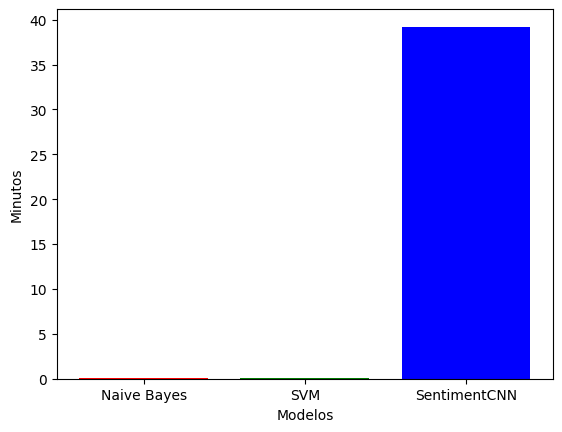

In [ ]:
# x-coordinates of left sides of bars
left = ["Naive Bayes", "SVM", "SentimentCNN"]


# heights of bars
height = [tiempo_nb_ed/60, tiempo_svm_ed/60, tiempo_cnn_ed/60]

# labels for bars
tick_label = ["Naive Bayes", "SVM", "SentimentCNN"]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'green', 'blue'])

# naming the x-axis
plt.xlabel('Modelos')
# naming the y-axis
plt.ylabel('Minutos')
# plot title
titulo = ""
plt.title(titulo)


# function to show the plot
plt.show()

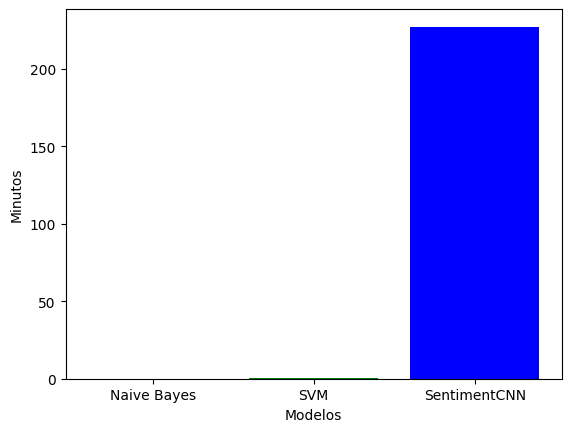

In [ ]:
# x-coordinates of left sides of bars
left = ["Naive Bayes", "SVM", "SentimentCNN"]


# heights of bars
height = [tiempo_nb_xed/60, tiempo_svm_xed/60, tiempo_cnn_xed/60]

# labels for bars
tick_label = ["Naive Bayes", "SVM", "SentimentCNN"]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'green', 'blue'])

# naming the x-axis
plt.xlabel('Modelos')
# naming the y-axis
plt.ylabel('Minutos')
# plot title
titulo = ""
plt.title(titulo)


# function to show the plot
plt.show()

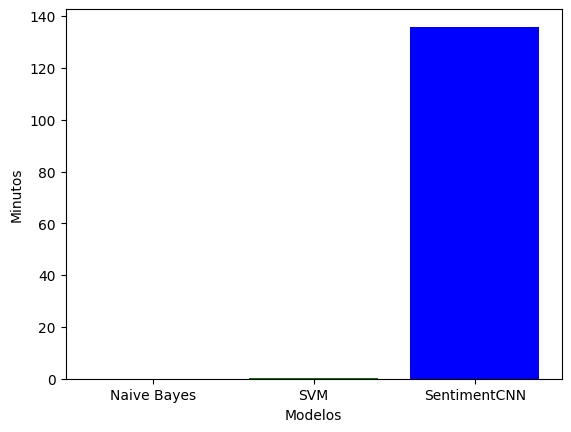

In [ ]:
# x-coordinates of left sides of bars
left = ["Naive Bayes", "SVM", "SentimentCNN"]


# heights of bars
height = [tiempo_nb_semeval/60, tiempo_svm_semeval/60, tiempo_cnn_semeval/60]

# labels for bars
tick_label = ["Naive Bayes", "SVM", "SentimentCNN"]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'green', 'blue'])

# naming the x-axis
plt.xlabel('Modelos')
# naming the y-axis
plt.ylabel('Minutos')
# plot title
titulo = ""
plt.title(titulo)


# function to show the plot
plt.show()

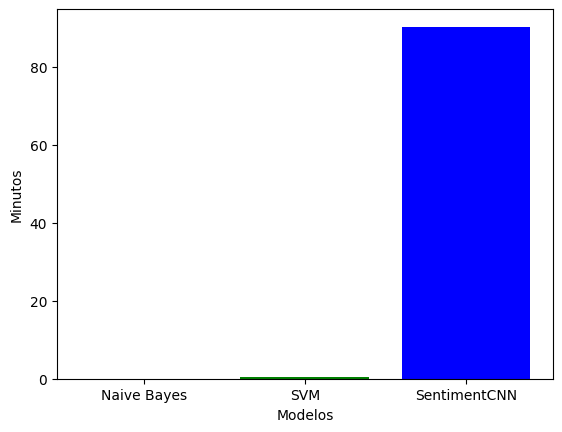

In [ ]:
# x-coordinates of left sides of bars
left = ["Naive Bayes", "SVM", "SentimentCNN"]


# heights of bars
height = [tiempo_nb_cc/60, tiempo_svm_cc/60, tiempo_cnn_cc/60]

# labels for bars
tick_label = ["Naive Bayes", "SVM", "SentimentCNN"]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'green', 'blue'])

# naming the x-axis
plt.xlabel('Modelos')
# naming the y-axis
plt.ylabel('Minutos')
# plot title
titulo = ""
plt.title(titulo)


# function to show the plot
plt.show()

# Evaluación modelo escogido

Evaluacion sobre los datos de validacion de Edmonds Dance del modelo elegido

##Entrenamiento de los 8 clasificadores

In [ ]:
vectorizer_felicidad = TfidfVectorizer()
x_train=vectorizer_felicidad.fit_transform(dataJoyEdmondsDance)
sparce_train = csr_matrix(scoresJoyEdmondsDance)
x_train = hstack((x_train, sparce_train))
y_train=LabelJoyEdmondsDance

modelo_felicidad = MultinomialNB()
modelo_felicidad.fit(x_train, y_train)

MultinomialNB()

In [ ]:
vectorizer_confianza = TfidfVectorizer()
x_train=vectorizer_confianza.fit_transform(dataTrustEdmondsDance)
sparce_train = csr_matrix(scoresTrusEdmondsDance)
x_train = hstack((x_train, sparce_train))
y_train=LabelTrusEdmondsDance

modelo_confianza = MultinomialNB()
modelo_confianza.fit(x_train, y_train)

MultinomialNB()

In [ ]:
vectorizer_miedo = TfidfVectorizer()
x_train=vectorizer_miedo.fit_transform(dataFearEdmondsDance)
sparce_train = csr_matrix(scoresFearEdmondsDance)
x_train = hstack((x_train, sparce_train))
y_train=LabelFeaEdmondsDance

modelo_miedo = MultinomialNB()
modelo_miedo.fit(x_train, y_train)

MultinomialNB()

In [ ]:
vectorizer_sorpresa = TfidfVectorizer()
x_train=vectorizer_sorpresa.fit_transform(dataSurpriseEdmondsDance)
sparce_train = csr_matrix(scoresSurpriseEdmondsDance)
x_train = hstack((x_train, sparce_train))
y_train=LabelSurpriseEdmondsDance

modelo_sorpresa = MultinomialNB()
modelo_sorpresa.fit(x_train, y_train)

MultinomialNB()

In [ ]:
vectorizer_tristeza = TfidfVectorizer()
x_train=vectorizer_tristeza.fit_transform(dataSadnessEdmondsDance)
sparce_train = csr_matrix(scoresSadnessEdmondsDance)
x_train = hstack((x_train, sparce_train))
y_train=LabelSadnessEdmondsDance

modelo_tristeza = MultinomialNB()
modelo_tristeza.fit(x_train, y_train)

MultinomialNB()

In [ ]:
vectorizer_disgusto = TfidfVectorizer()
x_train=vectorizer_disgusto.fit_transform(dataDisgustEdmondsDance)
sparce_train = csr_matrix(scoresDisgustEdmondsDance)
x_train = hstack((x_train, sparce_train))
y_train=LabelDisgustEdmondsDance

modelo_disgusto = MultinomialNB()
modelo_disgusto.fit(x_train, y_train)

MultinomialNB()

In [ ]:
vectorizer_furia = TfidfVectorizer()
x_train=vectorizer_furia.fit_transform(dataAngerEdmondsDance)
sparce_train = csr_matrix(scoresAngerEdmondsDance)
x_train = hstack((x_train, sparce_train))
y_train=LabelAngerEdmondsDance

modelo_furia = MultinomialNB()
modelo_furia.fit(x_train, y_train)

MultinomialNB()

In [ ]:
vectorizer_anticipacion = TfidfVectorizer()
x_train=vectorizer_anticipacion.fit_transform(dataAnticipationEdmondsDance)
sparce_train = csr_matrix(scoresAnticipationEdmondsDance)
x_train = hstack((x_train, sparce_train))
y_train=LabelAnticipationEdmondsDance

modelo_anticipacion = MultinomialNB()
modelo_anticipacion.fit(x_train, y_train)

MultinomialNB()

## Evaluacion

### Preparacion datos validacion y predicciones

In [ ]:
x_test=vectorizer_felicidad.transform(val_EdmondsDance_data)
sparce_test = csr_matrix(scores_val_EdmondsDance)
x_test = hstack((x_test, sparce_test))

pred_felicidad=modelo_felicidad.predict(x_test)

In [ ]:
x_test=vectorizer_confianza.transform(val_EdmondsDance_data)
sparce_test = csr_matrix(scores_val_EdmondsDance)
x_test = hstack((x_test, sparce_test))

pred_confianza=modelo_confianza.predict(x_test)

In [ ]:
x_test=vectorizer_miedo.transform(val_EdmondsDance_data)
sparce_test = csr_matrix(scores_val_EdmondsDance)
x_test = hstack((x_test, sparce_test))

pred_miedo=modelo_miedo.predict(x_test)

In [ ]:
x_test=vectorizer_sorpresa.transform(val_EdmondsDance_data)
sparce_test = csr_matrix(scores_val_EdmondsDance)
x_test = hstack((x_test, sparce_test))

pred_sorpresa=modelo_sorpresa.predict(x_test)

In [ ]:
x_test=vectorizer_tristeza.transform(val_EdmondsDance_data)
sparce_test = csr_matrix(scores_val_EdmondsDance)
x_test = hstack((x_test, sparce_test))

pred_tristeza=modelo_tristeza.predict(x_test)

In [ ]:
x_test=vectorizer_disgusto.transform(val_EdmondsDance_data)
sparce_test = csr_matrix(scores_val_EdmondsDance)
x_test = hstack((x_test, sparce_test))

pred_disgusto=modelo_disgusto.predict(x_test)

In [ ]:
x_test=vectorizer_furia.transform(val_EdmondsDance_data)
sparce_test = csr_matrix(scores_val_EdmondsDance)
x_test = hstack((x_test, sparce_test))

pred_furia=modelo_furia.predict(x_test)

In [ ]:
x_test=vectorizer_anticipacion.transform(val_EdmondsDance_data)
sparce_test = csr_matrix(scores_val_EdmondsDance)
x_test = hstack((x_test, sparce_test))

pred_anticipacion=modelo_anticipacion.predict(x_test)

### Resultados

In [ ]:
print("Evaluacion felicidad")
print('Accuracy: ',
          accuracy_score(val_EdmondsDance_label[0], pred_felicidad)*100, '%')
print('F1: ',
          f1_score(val_EdmondsDance_label[0], pred_felicidad)*100, '%')
print('Recall: ',
          recall_score(val_EdmondsDance_label[0], pred_felicidad)*100, '%')
print('Precision: ',
          precision_score(val_EdmondsDance_label[0], pred_felicidad)*100, '%')
print("Matriz de confusion: ")
print(confusion_matrix(val_EdmondsDance_label[0], pred_felicidad))

Evaluacion felicidad
Accuracy:  62.96296296296296 %
F1:  64.28571428571429 %
Recall:  56.25 %
Precision:  75.0 %
Matriz de confusion: 
[[16  6]
 [14 18]]


In [ ]:
print("Evaluacion confianza")
print('Accuracy: ',
          accuracy_score(val_EdmondsDance_label[1], pred_confianza)*100, '%')
print('F1: ',
          f1_score(val_EdmondsDance_label[1], pred_confianza)*100, '%')
print('Recall: ',
          recall_score(val_EdmondsDance_label[1], pred_confianza)*100, '%')
print('Precision: ',
          precision_score(val_EdmondsDance_label[1], pred_confianza)*100, '%')
print("Matriz de confusion: ")
print(confusion_matrix(val_EdmondsDance_label[1], pred_confianza))

Evaluacion confianza
Accuracy:  68.51851851851852 %
F1:  80.89887640449437 %
Recall:  97.2972972972973 %
Precision:  69.23076923076923 %
Matriz de confusion: 
[[ 1 16]
 [ 1 36]]


In [ ]:
print("Evaluacion miedo")
print('Accuracy: ',
          accuracy_score(val_EdmondsDance_label[2], pred_miedo)*100, '%')
print('F1: ',
          f1_score(val_EdmondsDance_label[2], pred_miedo)*100, '%')
print('Recall: ',
          recall_score(val_EdmondsDance_label[2], pred_miedo)*100, '%')
print('Precision: ',
          precision_score(val_EdmondsDance_label[2], pred_miedo)*100, '%')
print("Matriz de confusion: ")
print(confusion_matrix(val_EdmondsDance_label[2], pred_miedo))

Evaluacion miedo
Accuracy:  46.2962962962963 %
F1:  32.558139534883715 %
Recall:  77.77777777777779 %
Precision:  20.588235294117645 %
Matriz de confusion: 
[[18 27]
 [ 2  7]]


In [ ]:
print("Evaluacion sorpresa")
print('Accuracy: ',
          accuracy_score(val_EdmondsDance_label[3], pred_sorpresa)*100, '%')
print('F1: ',
          f1_score(val_EdmondsDance_label[3], pred_sorpresa)*100, '%')
print('Recall: ',
          recall_score(val_EdmondsDance_label[3], pred_sorpresa)*100, '%')
print('Precision: ',
          precision_score(val_EdmondsDance_label[3], pred_sorpresa)*100, '%')
print("Matriz de confusion: ")
print(confusion_matrix(val_EdmondsDance_label[3], pred_sorpresa))

Evaluacion sorpresa
Accuracy:  51.85185185185185 %
F1:  0.0 %
Recall:  0.0 %
Precision:  0.0 %
Matriz de confusion: 
[[28 26]
 [ 0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Evaluacion tristeza")
print('Accuracy: ',
          accuracy_score(val_EdmondsDance_label[4], pred_tristeza)*100, '%')
print('F1: ',
          f1_score(val_EdmondsDance_label[4], pred_tristeza)*100, '%')
print('Recall: ',
          recall_score(val_EdmondsDance_label[4], pred_tristeza)*100, '%')
print('Precision: ',
          precision_score(val_EdmondsDance_label[4], pred_tristeza)*100, '%')
print("Matriz de confusion: ")
print(confusion_matrix(val_EdmondsDance_label[4], pred_tristeza))

Evaluacion tristeza
Accuracy:  62.96296296296296 %
F1:  50.0 %
Recall:  83.33333333333334 %
Precision:  35.714285714285715 %
Matriz de confusion: 
[[24 18]
 [ 2 10]]


In [ ]:
print("Evaluacion disgusto")
print('Accuracy: ',
          accuracy_score(val_EdmondsDance_label[5], pred_disgusto)*100, '%')
print('F1: ',
          f1_score(val_EdmondsDance_label[5], pred_disgusto)*100, '%')
print('Recall: ',
          recall_score(val_EdmondsDance_label[5], pred_disgusto)*100, '%')
print('Precision: ',
          precision_score(val_EdmondsDance_label[5], pred_disgusto)*100, '%')
print("Matriz de confusion: ")
print(confusion_matrix(val_EdmondsDance_label[5], pred_disgusto))

Evaluacion disgusto
Accuracy:  70.37037037037037 %
F1:  38.46153846153846 %
Recall:  45.45454545454545 %
Precision:  33.33333333333333 %
Matriz de confusion: 
[[33 10]
 [ 6  5]]


In [ ]:
print("Evaluacion furia")
print('Accuracy: ',
          accuracy_score(val_EdmondsDance_label[6], pred_furia)*100, '%')
print('F1: ',
          f1_score(val_EdmondsDance_label[6], pred_furia)*100, '%')
print('Recall: ',
          recall_score(val_EdmondsDance_label[6], pred_furia)*100, '%')
print('Precision: ',
          precision_score(val_EdmondsDance_label[6], pred_furia)*100, '%')
print("Matriz de confusion: ")
print(confusion_matrix(val_EdmondsDance_label[6], pred_furia))

Evaluacion furia
Accuracy:  64.81481481481481 %
F1:  45.714285714285715 %
Recall:  88.88888888888889 %
Precision:  30.76923076923077 %
Matriz de confusion: 
[[27 18]
 [ 1  8]]


In [ ]:
print("Evaluacion anticipacion")
print('Accuracy: ',
          accuracy_score(val_EdmondsDance_label[7], pred_anticipacion)*100, '%')
print('F1: ',
          f1_score(val_EdmondsDance_label[7], pred_anticipacion)*100, '%')
print('Recall: ',
          recall_score(val_EdmondsDance_label[7], pred_anticipacion)*100, '%')
print('Precision: ',
          precision_score(val_EdmondsDance_label[7], pred_anticipacion)*100, '%')
print("Matriz de confusion: ")
print(confusion_matrix(val_EdmondsDance_label[7], pred_anticipacion))

Evaluacion anticipacion
Accuracy:  51.85185185185185 %
F1:  60.60606060606061 %
Recall:  71.42857142857143 %
Precision:  52.63157894736842 %
Matriz de confusion: 
[[ 8 18]
 [ 8 20]]
